In [1]:
import pandas as pd
df = pd.concat([
    pd.read_csv(filepath_or_buffer='../input/meterology/casual.csv'),
    pd.read_csv(filepath_or_buffer='../input/meterology/member.csv')
])
df['start'] = pd.to_datetime(df['startdate'] + ' ' + df['starttime'], )
df['stop'] = pd.to_datetime(df['stopdate'] + ' ' + df['stoptime'], )
df['duration'] = df['stop'] - df['start']
df.sample(5)

,ride_id,member_casual,startdate,starttime,stopdate,stoptime,rideable_type,tripduration,max_temperature_c,min_temperature_c,temperature_morning_c,temperature_noon_c,temperature_evening_c,temperature_night_c,precip_total_day_mm,windspeed_max_kmh,cloudcover_avg_percent,start,stop,duration
499687,7E6912E9BA39A3D8,casual,2022-08-20,14:57:21,2022-08-20,15:30:16,electric_bike,32,28,20,20,28,24,22,0.2,12,37.375,2022-08-20 14:57:21,2022-08-20 15:30:16,0 days 00:32:55
337039,A7755F93B2F6FDDF,casual,2022-12-31,23:49:19,2023-01-01,00:23:29,classic_bike,34,4,2,3,4,4,2,0.4,17,98.375,2022-12-31 23:49:19,2023-01-01 00:23:29,0 days 00:34:10
894317,87187F7C853F62C5,member,2022-10-20,14:36:39,2022-10-20,14:57:01,classic_bike,20,16,5,5,12,13,5,0.0,22,18.500,2022-10-20 14:36:39,2022-10-20 14:57:01,0 days 00:20:22
119620,B985156FDA5D48B1,member,2023-05-05,17:18:49,2023-05-05,17:28:16,classic_bike,9,18,10,10,16,16,10,0.0,16,32.375,2023-05-05 17:18:49,2023-05-05 17:28:16,0 days 00:09:27
569670,887444AC0F5C9886,member,2022-12-04,12:13:58,2022-12-04,12:19:30,classic_bike,5,7,-2,-2,2,6,-2,0.0,27,37.375,2022-12-04 12:13:58,2022-12-04 12:19:30,0 days 00:05:32


In [2]:
df.shape

(3877902, 20)

<Axes: >

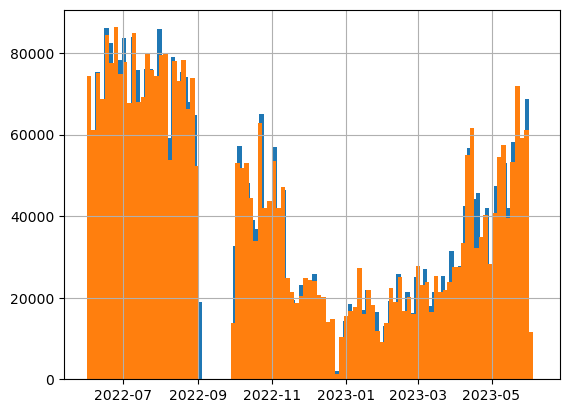

In [3]:
%matplotlib inline
bins=100
df['start'].hist(bins=bins)
df['stop'].hist(bins=bins)

That's weird; where's the September 2022 data?

In [4]:
df.dtypes

ride_id                            object
member_casual                      object
startdate                          object
starttime                          object
stopdate                           object
stoptime                           object
rideable_type                      object
tripduration                        int64
max_temperature_c                   int64
min_temperature_c                   int64
temperature_morning_c               int64
temperature_noon_c                  int64
temperature_evening_c               int64
temperature_night_c                 int64
precip_total_day_mm               float64
windspeed_max_kmh                   int64
cloudcover_avg_percent            float64
start                      datetime64[ns]
stop                       datetime64[ns]
duration                  timedelta64[ns]
dtype: object

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='start', ylabel='tripduration'>

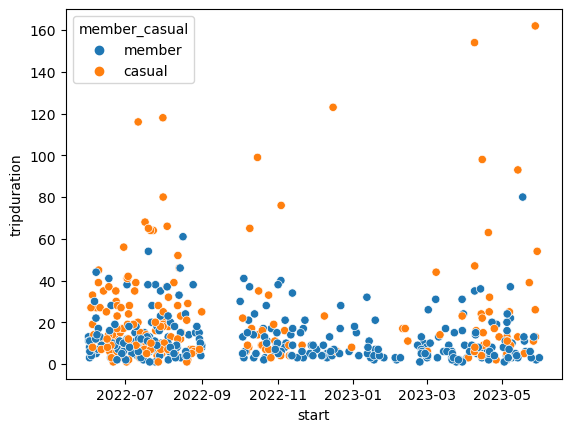

In [5]:
from seaborn import scatterplot
scatterplot(data=df.sample(500), x='start', y='tripduration', hue='member_casual')